In [1]:
from pandas import Series,DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

Here we are trying to obtin the winning probablity of an IPL(INDIAN PREMIER LEAGUE ) team based upon a dataset obtained from kaggle. Here we are trying to obtain the probablity based upon the data mining techniques .Thus we try to predict the winner of  each match based upon the prior available inforamtion about the match. 

In [2]:
df=pd.read_csv("matches.csv")
df1=DataFrame([df["city"],df["team1"],df["team2"],df["toss_winner"],df["toss_decision"],df["winner"],df["venue"]]).T

In [3]:
df1.head()

,city,team1,team2,toss_winner,toss_decision,winner,venue
0,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal"
1,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,Maharashtra Cricket Association Stadium
2,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,Saurashtra Cricket Association Stadium
3,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,Holkar Cricket Stadium
4,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,M Chinnaswamy Stadium


In [4]:
def team(name):
    hy=[]
    ct=[]
    t2=[]
    td=[]
    w=[]
    v=[]
    t1=[]
    for i in np.arange(len(df1["city"])):
        if df1["team1"][i]==name:
            ct=np.append(ct,df1["city"][i])
            t1=np.append(t1,name)
            t2=np.append(t2,df1["team2"][i])
            td=np.append(td,df1["toss_decision"][i])
            w=np.append(w,df1["winner"][i])
            v=np.append(v,df1["venue"][i])
    teamdf=DataFrame([ct,t1,t2,td,w,v],index=["city","team1","team2","toss_decision","winner","venue"]).T
    return teamdf

In [5]:
team("Kolkata Knight Riders").head()

,city,team1,team2,toss_decision,winner,venue
0,Mumbai,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,Wankhede Stadium
1,Kolkata,Kolkata Knight Riders,Sunrisers Hyderabad,field,Kolkata Knight Riders,Eden Gardens
2,Kolkata,Kolkata Knight Riders,Gujarat Lions,field,Gujarat Lions,Eden Gardens
3,Kolkata,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,Eden Gardens
4,Kolkata,Kolkata Knight Riders,Rising Pune Supergiant,field,Rising Pune Supergiant,Eden Gardens


In [6]:
def winfrq(team2): 
    kkr=team(team2) 
    pw=0
    for i in np.arange(len(kkr["city"])):
        if (kkr["winner"][i]==team2):
            pw=(pw+1)
    return pw

In [7]:
def px4w(tem):
    kkr=team(tem)     
    pw1=winfrq(tem)
                            #this is the function taking the team and this giving the winnning proobablity for fielding and batting respectively
    pb=0
    pf=0
    for i in np.arange(len(kkr["city"])):
        if (kkr["toss_decision"][i]=="field") & (kkr["winner"][i]==tem):
             pf=(pf+1)
        elif (kkr["toss_decision"][i]=="bat") & (kkr["winner"][i]==tem):
             pb=(pb+1)
    return pb/pw1,pf/pw1

In [8]:
(px4w("Kolkata Knight Riders"))               #so this give sthe fdact that the prob of kkr winning field first is more than bat first

(0.5172413793103449, 0.4827586206896552)

([<matplotlib.patches.Wedge at 0x23a46fdf080>,
 [Text(-0.05955272852093169, 1.0983867590815688, 'field_first'),
  Text(0.05955262568254085, -1.098386764657293, 'bat_first')])

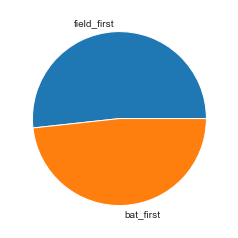

In [76]:
lb=["field_first","bat_first"]
plt.pie(px4w("Kolkata Knight Riders"),labels=lb)

this plot gives the probability of winning of KKR when batting and Fielding first

([<matplotlib.patches.Wedge at 0x23a45782668>,
 [Text(0.1101052477049507, 1.0944755979133713, 'field_first'),
  Text(-0.11010524770495109, -1.0944755979133713, 'bat_first')])

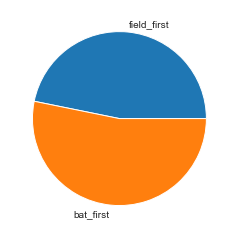

In [78]:
plt.pie(px4w("Mumbai Indians"),labels=lb)

([<matplotlib.patches.Wedge at 0x23a491cd390>,
 [Text(0.9515225863629644, 1.3480002847333288, 'field_first'),
  Text(-0.9515225863629643, -1.348000284733329, 'bat_first')])

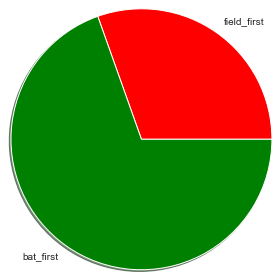

In [94]:
plt.pie(px4w("Sunrisers Hyderabad"),labels=lb,shadow=True,radius=1.5,colors=["red","green"])

Clerly the teams like KKr and MI do not depend too much on toss while the team like SRH is highly biased towards batting first and winning. This indicates that thay have a good bolwling line up.

In [9]:
venues=Series(np.unique(df1["venue"]))

In [10]:
def ven(tem,ground):
    kkr=team(tem)  
    pw1=winfrq(tem)
    pb=0
    for i in np.arange(len(kkr["city"])):
          if (kkr["venue"][i]==ground) & (kkr["winner"][i]==tem):
                pb=pb+1
    return pb/pw1 

In [11]:
ven("Kolkata Knight Riders","M Chinnaswamy Stadium")
#ven("Sunrisers Hyderabad","Sharjah Cricket Stadium")

0.06896551724137931

In [12]:
def winven(team):
    s=[]
    for i in venues:
        s=np.append(s,(ven(team,i)))
    dfven=DataFrame(s,index=venues,columns=["prob"])   
    return dfven

In [13]:
def home(team,venu):
    ph=(winven(team)["prob"])[venu]
    pa=1-ph
    return ph,pa

In [31]:
(winven("Kolkata Knight Riders")["prob"])   

Barabati Stadium                                        0.000000
Brabourne Stadium                                       0.000000
Buffalo Park                                            0.000000
De Beers Diamond Oval                                   0.000000
Dr DY Patil Sports Academy                              0.034483
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     0.000000
Dubai International Cricket Stadium                     0.000000
Eden Gardens                                            0.551724
Feroz Shah Kotla                                        0.034483
Green Park                                              0.000000
Himachal Pradesh Cricket Association Stadium            0.000000
Holkar Cricket Stadium                                  0.000000
JSCA International Stadium Complex                      0.000000
Kingsmead                                               0.000000
M Chinnaswamy Stadium                                   0.068966
MA Chidambaram Stadium, C

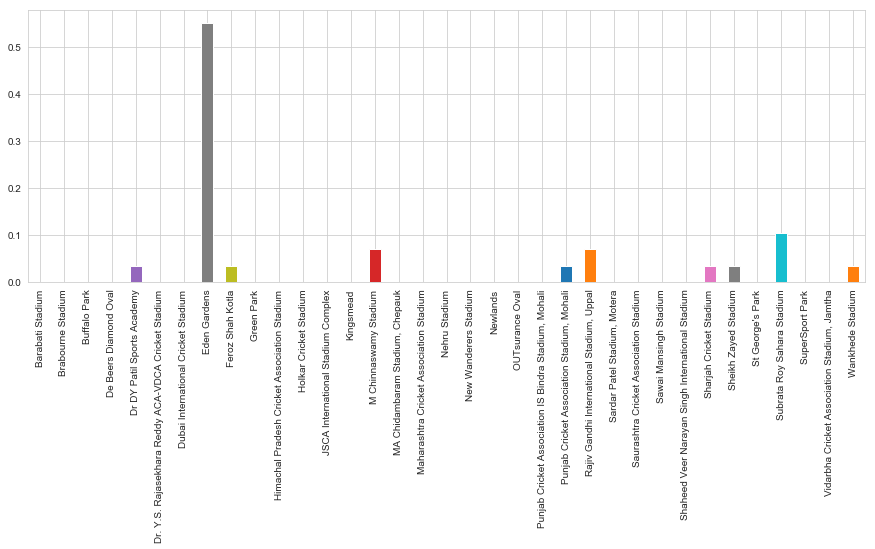

In [36]:
(winven("Kolkata Knight Riders")["prob"]).plot(kind="bar",label=True,figsize=(15,5))

this plot gives us the probabity of winning of KKR at various venues . 

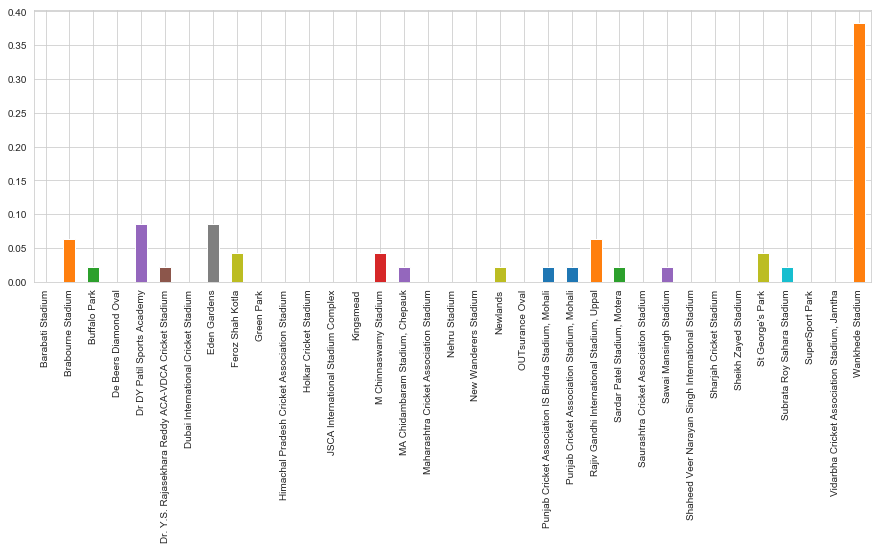

In [62]:
(winven("Mumbai Indians")["prob"]).plot(kind="bar",label=True,figsize=(15,5),alpha=1)

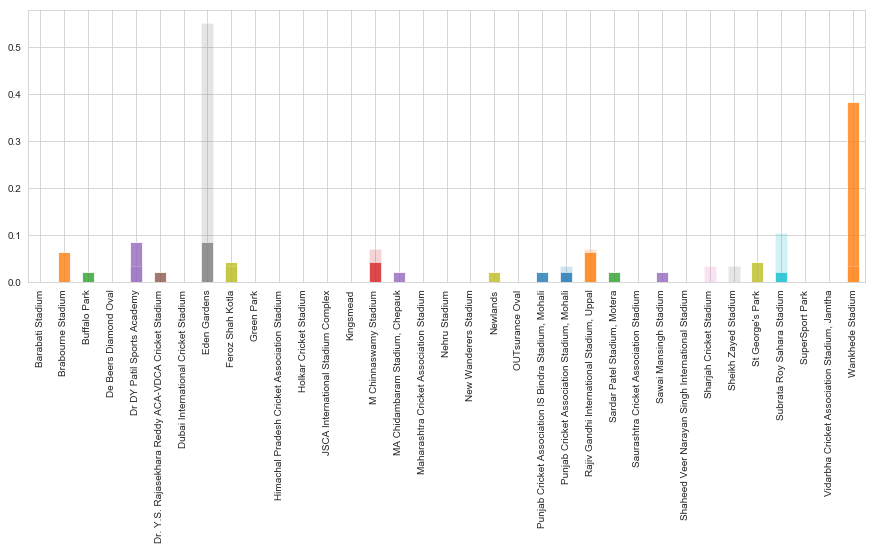

In [63]:
(winven("Mumbai Indians")["prob"]).plot(kind="bar",label=True,figsize=(15,5),alpha=.8)
(winven("Kolkata Knight Riders")["prob"]).plot(kind="bar",label=True,figsize=(15,5),alpha=.2)

In [15]:
teams=np.unique(df1["team2"])
teams

array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils',
       'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors',
       'Rajasthan Royals', 'Rising Pune Supergiant',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad'], dtype=object)

In [16]:
def opps(tem,opp):
    kkr=team(tem)  
    pw1=winfrq(tem)
    pb=0
    for i in np.arange(len(kkr["city"])):
          if (kkr["team2"][i]==opp) & (kkr["winner"][i]==tem):
                pb=pb+1
    return pb/pw1 

In [17]:
def oppdis(team):
    s=[]
    for i in teams:
        s=np.append(s,(opps(team,i)))
    dfwdis=DataFrame(s,index=teams,columns=["prob"]) 
    return dfwdis

In [18]:
venues

0                                      Barabati Stadium
1                                     Brabourne Stadium
2                                          Buffalo Park
3                                 De Beers Diamond Oval
4                            Dr DY Patil Sports Academy
5     Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
6                   Dubai International Cricket Stadium
7                                          Eden Gardens
8                                      Feroz Shah Kotla
9                                            Green Park
10         Himachal Pradesh Cricket Association Stadium
11                               Holkar Cricket Stadium
12                   JSCA International Stadium Complex
13                                            Kingsmead
14                                M Chinnaswamy Stadium
15                      MA Chidambaram Stadium, Chepauk
16              Maharashtra Cricket Association Stadium
17                                        Nehru 

In [19]:
oppdis("Royal Challengers Bangalore")

,prob
Chennai Super Kings,0.100000
Deccan Chargers,0.066667
Delhi Daredevils,0.200000
Gujarat Lions,0.066667
Kings XI Punjab,0.166667
Kochi Tuskers Kerala,0.000000
Kolkata Knight Riders,0.000000
Mumbai Indians,0.100000
Pune Warriors,0.133333
Rajasthan Royals,0.100000


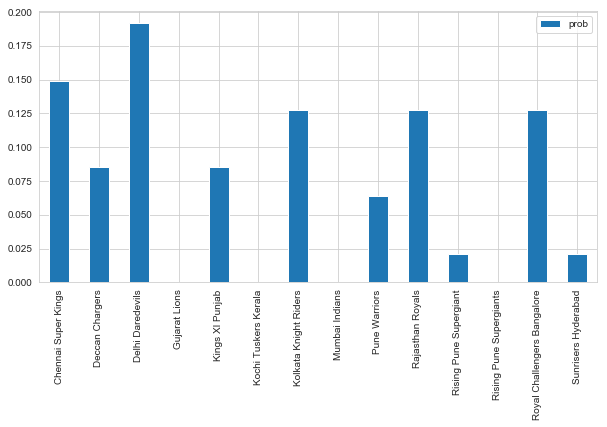

In [52]:
oppdis("Mumbai Indians").plot(kind="bar",figsize=(10,5),label=True)

 this plot gives the probablity of winning of MI against various teams in IPL.

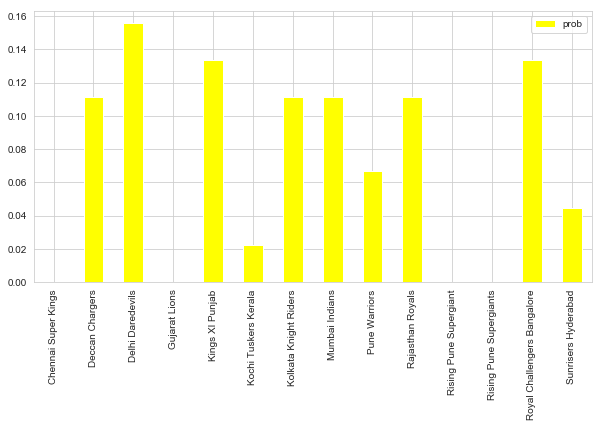

In [61]:
oppdis("Chennai Super Kings").plot(kind="bar",figsize=(10,5),color="yellow",alpha=1)

In [20]:
(px4w("Kolkata Knight Riders")[0])*((winven("Kolkata Knight Riders")["prob"])[4])*((oppdis("Kolkata Knight Riders")["prob"])[2])

0.003075156832998483

In [21]:
def conprob(yrtm,opp,ven,toss,in51):
    if toss=="field":
        toss=0
    if toss=="bat":
        toss=1
    if in51=="yes":
        pyrtm=home(yrtm,ven)[0]
    else:
        pyrtm=home(yrtm,ven)[1]
    py=(px4w(yrtm)[toss])*pyrtm*((oppdis(yrtm)["prob"])[opp])
    if ((winven(yrtm)["prob"])[ven])==0:
        tem=.000001
        postpre=(px4w(yrtm)[toss])*tem*((oppdis(yrtm)["prob"])[opp])
    else :
        postpre=(px4w(yrtm)[toss])*((winven(yrtm)["prob"])[ven])*((oppdis(yrtm)["prob"])[opp])
    return py

In [22]:
conprob("Kolkata Knight Riders","Sunrisers Hyderabad","Eden Gardens","field","yes")

0.03936200746238058

In [25]:
conprob("Kolkata Knight Riders","Sunrisers Hyderabad","Wankhede Stadium","bat","no")

0.06429127885522162

# here we obtain the prior probablity

In [23]:
in1=input(" plz enter team1 ", )      
in2=input(" plz enter team2 ", )       
in3=input(" plz enter venue ", ) 
in51=input("is the venue  home groung for team1(yes/no) ", )
in61=input("is the venue home ground for team2(yes/no) ",  )
in4=input(" plz enter your bat or field first ", )       

 plz enter team1 Mumbai Indians
 plz enter team2 Chennai Super Kings
 plz enter venue Rajiv Gandhi International Stadium, Uppal
is the venue  home groung for team1(yes/no) no
is the venue home ground for team2(yes/no) no
 plz enter your bat or field first bat


In [24]:
if in4=="field":
    in5="bat"
elif in4=="bat":
    in5="field"
p1=conprob(in1,in2,in3,in4,in51)
p2=conprob(in2,in1,in3,in5,in61)
if p1>p2:
    print(in1,"has more probablity to win in the given conditions")
elif p2>p1:
    print(in2,"has a greater chance of winning in the given conditions")
elif p2==p1:
    print("Both teams",in1,"and",in2,"has equal chances of winning under the given condtions")
elif p1==0 or p2==0 :
    print("Data inadequate")
else :
     print("Data inadequate")

Mumbai Indians has more probablity to win in the given conditions


In [29]:
p1

0.07416468412586806

In [30]:
p2

0.07001371742112483

# here we are dealing with the posterior probablity

In [25]:
currdf=pd.read_csv("ipl2019.csv")

In [26]:
currdf["win"]

0     9.0
1     NaN
2     9.0
3     NaN
4     6.0
5     NaN
6     6.0
7     9.0
8     NaN
9     5.0
10    NaN
11    NaN
12    5.0
13    6.0
Name: win, dtype: float64

In [27]:
def postpro(tem1):
    for i in np.arange(len(currdf["teams"])):
        if (currdf)["teams"][i]==tem1:
            ppwin=(currdf)["win"][i]/((currdf)["win"][i]+(currdf)["loss"][i])
    return ppwin

In [28]:
postpro(in1)*p1

0.04767729693805804

In [29]:
postpro(in2)*p2

0.04500881834215168